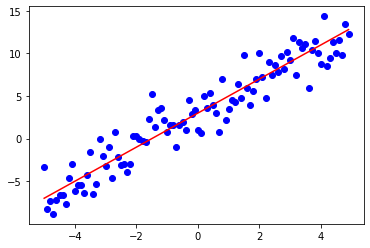

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-5,5,0.1)
y  =2*x+3
# the above line will fit to the linear line completely, all datapoints will lie on the straight line.
# therefore we will add noise to the data

y_noise = 2 * np.random.normal(size = x.size)
y_noise;
y_data = y + y_noise
#help(np.random.normal)
plt.plot(x,y_data,"bo")
plt.plot(x,y,"r")

plt.show()




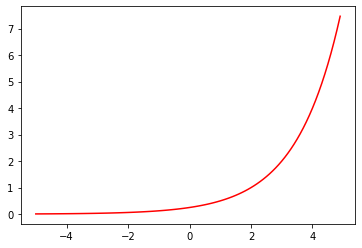

In [2]:
x = np.arange(-5,5,0.1)

#np.power raises the first number to the power of second in parenthesis.
y = np.power(2,x-2)

plt.plot(x , y ,'r')

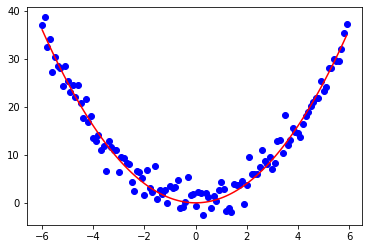

In [3]:
#                                           Quadratic expressions

x = np.arange(-6,6,0.1)
y=np.power(x,2)
y_noise = 2* np.random.normal(size=x.size)
y_data = y + y_noise
plt.plot(x, y_data , 'bo')
plt.plot(x, y , 'r')
plt.show()

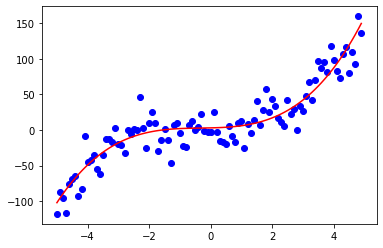

In [4]:

## Non linear Regression

x = np.arange(-5, 5 ,0.1)
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20* np.random.normal(size = x.size)
#y_noise = np.random.normal(size = x.size)
# if you donot use the 20 mutiple, the noised data will even be very close to line showing trend.

y_data = y + y_noise

# data is initialized, now visualizing it.
plt.plot(x, y_data , 'bo')
plt.plot(x, y, 'r')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

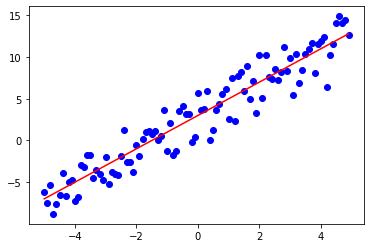

In [6]:
x = np.arange(-5,5,0.1)
y  =2*x+3
# the above line will fit to the linear line completely, all datapoints will lie on the straight line.
# therefore we will add noise to the data

y_noise = 2 * np.random.normal(size = x.size)
y_noise;
y_data = y + y_noise
#help(np.random.normal)
plt.plot(x,y_data,"bo")
plt.plot(x,y,"r")

plt.show()

## Non linear Regression

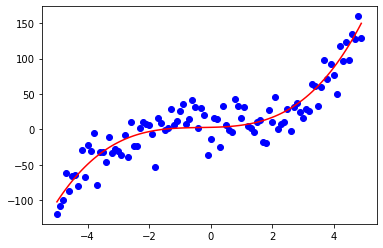

In [7]:
x = np.arange(-5, 5 ,0.1)
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20* np.random.normal(size = x.size)
#y_noise = np.random.normal(size = x.size)
# if you donot use the 20 mutiple, the noised data will even be very close to line showing trend.

y_data = y + y_noise

# data is initialized, now visualizing it.
plt.plot(x, y_data , 'bo')
plt.plot(x, y, 'r')

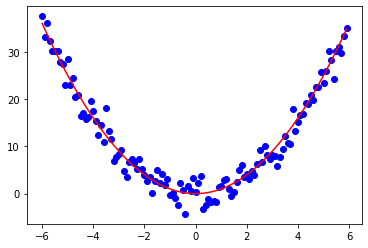

In [8]:
#                                           Quadratic expressions

x = np.arange(-6,6,0.1)
y=np.power(x,2)
y_noise = 2* np.random.normal(size=x.size)
y_data = y + y_noise
plt.plot(x, y_data , 'bo')
plt.plot(x, y , 'r')
plt.show()

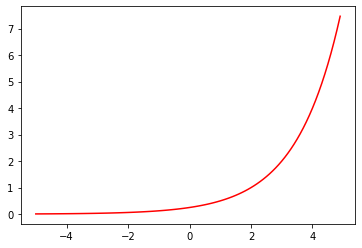

In [9]:
x = np.arange(-5,5,0.1)

#np.power raises the first number to the power of second in parenthesis.
y = np.power(2,x-2)

plt.plot(x , y ,'r')


## Sigmoidal Function

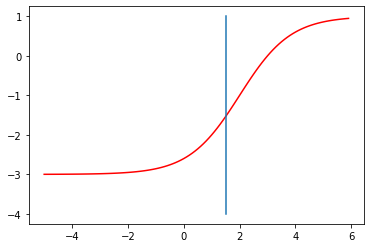

In [10]:
x = np.arange(-5,6 , 0.1)
y = 1- 4/ (1 + np.power(3, x-2))
plt.plot(x , y ,'r')
s1 = (1.5,1.5);  s2 = (1,-4);
plt.plot(s1,s2);

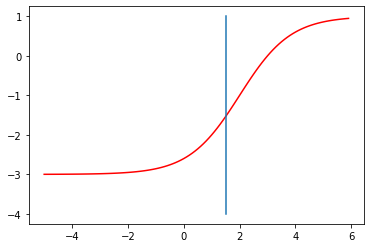

In [11]:
## Sigmoidal Function

x = np.arange(-5,6 , 0.1)
y = 1- 4/ (1 + np.power(3, x-2))
plt.plot(x , y ,'r')
s1 = (1.5,1.5);  s2 = (1,-4);
plt.plot(s1,s2);



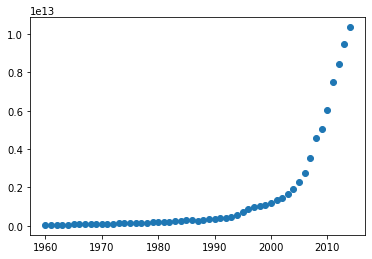

In [12]:
import pandas as pd
df = pd.read_csv("china_gdp.csv")
df.head()

x_data , y_data = (df["Year"].values , df["Value"].values)
plt.plot(x_data,y_data,"o")


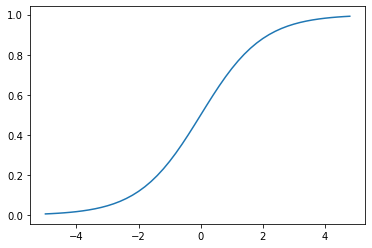

In [13]:

# now fit a function to this data like sigmoid fn.
# for this we will firstly look at the various plots that can align with this data.

x = np.arange(-5,5,0.2)
y = 1/(1 + np.exp(-x))
plt.plot(x, y )



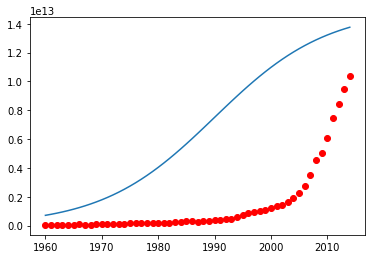

In [14]:
# now we have seen that the logistic function can fit this data, we will use this for our data.

def sigmoid(x , theta , Beta):
    y = 1/(1 + np.exp(- theta * (x - Beta)))
    return y

# Using this sigmoid function.
theta = 0.1   # theta is learning rate
beta = 1990

y_pred = sigmoid(x_data, theta , beta)
plt.plot(x_data, y_data ,"ro")
plt.plot(x_data, y_pred*15000000000000)

In [15]:
# to fit this data with the curve, normalize the data
x_nm = x_data/ max(x_data)
y_nm = y_data / max(y_data)



In [16]:
# for best fit line, we need best parameters for our fit line.
# curve_fit fits the non-linear data

from scipy.optimize import curve_fit
opt_p ,cov_p = curve_fit(sigmoid, x_nm , y_nm)
print("Values of beta and theta are : %.2f " % opt_p[0], opt_p[1])

Values of beta and theta are : 690.45  0.9972071272536187


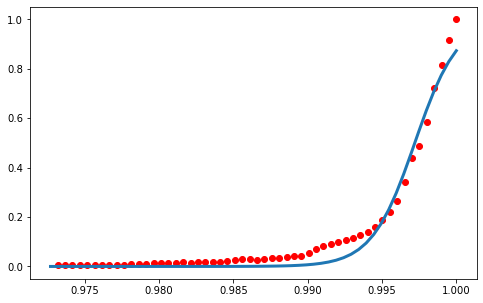

In [25]:
x = np.linspace(1960,2015,55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *opt_p)
plt.plot(x_nm, y_nm , "ro",label='normalized data')
plt.plot(x, y, linewidth=3, label='fit')
plt.show()
#help("scipy.optimize")

### predicting more values on the same curve

In [41]:

msk = np.random.rand(len(df)) < 0.8
train_x = x_nm[msk]
train_y = y_nm[msk]

test_x = x_nm[~msk]
test_y = y_nm[~msk]

# building the model
opt_p , cov_p = curve_fit(sigmoid, train_x , train_y)

# predict using test set
y_pred = sigmoid(test_x, *opt_p)

# checking the errors
print('MAE : %.2f'% np.mean(np.absolute(y_pred - test_y)))
print("MSE : %2f"%np.mean((y_pred - test_y)**2))

from sklearn.metrics import r2_score

print("R2- score: %.2f"% r2_score(y_pred, test_y))



MAE : 0.04
MSE : 0.001892
R2- score: 0.93


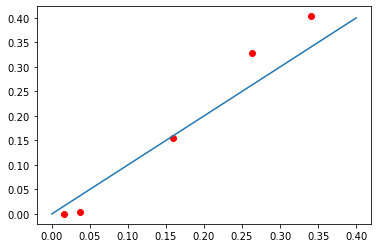

In [54]:
plt.plot(test_y, y_pred, "ro")

x_p = [0,0.1,0.2,0.3,0.4]
y_p = [0,0.1,0.2,0.3,0.4]

plt.plot(x_p, y_p)
plt.show()